In [53]:
#importing required libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

Importing the IMAGE

In [98]:
image_bgr = cv2.imread('road_in_rorway.jpg')

In [99]:
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

In [100]:
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_RGB2GRAY)

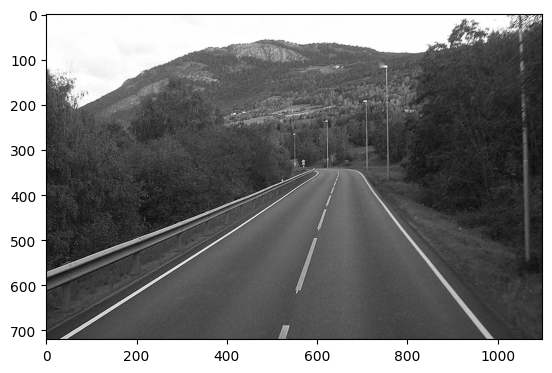

In [101]:
plt.imshow(image_gray, cmap='gray')

Setting The Region Of Interest

In [22]:
image_height = image_gray.shape[0]
image_width = image_gray.shape[1]

In [83]:
region_of_intrest_vertices = np.array([[(0, image_height), (650, 300), (image_width, image_height)]], dtype=np.int32)

In [104]:
image_edges = cv2.Canny(image_gray, 100, 200, apertureSize=3)

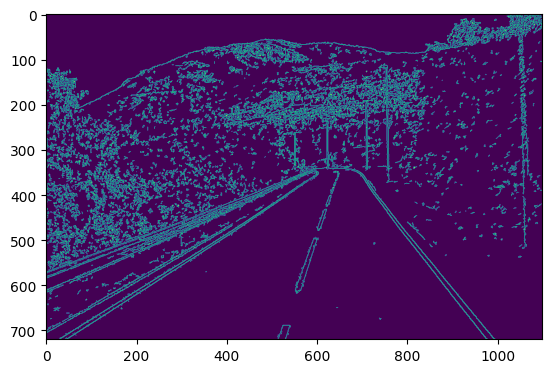

In [105]:
plt.imshow(image_edges)

In [106]:
def region_of_interest(image, points):
    '''Return the masked region interest Image'''
    #mask = np.zeros_like(image_rgb)
    color_channel = image_rgb.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, points, match_mask_color)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

In [107]:
cropped_image = region_of_interest(image_edges, region_of_intrest_vertices)

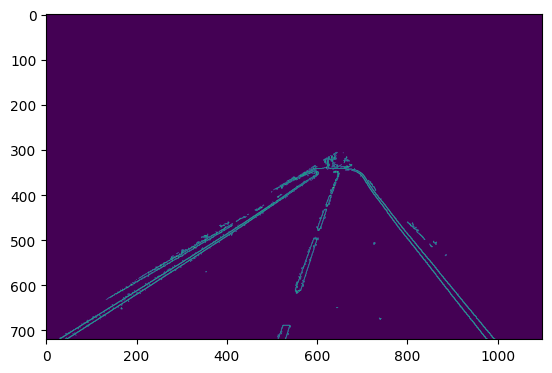

In [110]:
plt.imshow(cropped_image)